In [99]:
pip install scikit-learn==0.24.2

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies: started
  Installing build dependencies: still running...
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [62 lines of output]
      <string>:17: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      Partial import of sklearn during the build process.
      <string>:116: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
      INFO: No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
      Traceback (most recent call last):
        File "c:\Users\abudo\anaconda3\Li

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/survey_results_public.csv")

In [101]:
df.head()

,ConvertedCompYearly,Employment,EdLevel,YearsCode,Country,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285000.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,United States of America,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,250000.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,United States of America,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,156000.0,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,United States of America,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23456.0,"Employed, full-time;Independent contractor, fr...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,Philippines,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df = df[["Country", "EdLevel", "YearsCode", "Employment", "ConvertedCompYearly"]]
df = df.rename({"ConvertedCompYearly": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Employed, full-time;Independent contractor, fr...",23456.0


In [103]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCode,Employment,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,"Employed, full-time",285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,"Employed, full-time",250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,"Employed, full-time",156000.0
4,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,"Employed, full-time;Independent contractor, fr...",23456.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,"Employed, full-time",96828.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48019 entries, 1 to 89171
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     48019 non-null  object 
 1   EdLevel     48019 non-null  object 
 2   YearsCode   47950 non-null  object 
 3   Employment  48007 non-null  object 
 4   Salary      48019 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [105]:
df = df.dropna()
df.isnull().sum()

Country       0
EdLevel       0
YearsCode     0
Employment    0
Salary        0
dtype: int64

In [106]:
df = df[df["Employment"] == "Employed, full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39241 entries, 1 to 89171
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    39241 non-null  object 
 1   EdLevel    39241 non-null  object 
 2   YearsCode  39241 non-null  object 
 3   Salary     39241 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.5+ MB


In [107]:
df.head()

,Country,EdLevel,YearsCode,Salary
1,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,285000.0
2,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,250000.0
3,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,156000.0
5,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,96828.0
6,United States of America,Some college/university study without earning ...,4,135000.0


In [108]:
df['Country'].value_counts()

Country
United States of America                                10589
Germany                                                  3212
United Kingdom of Great Britain and Northern Ireland     3083
Canada                                                   1812
India                                                    1609
                                                        ...  
Saint Lucia                                                 1
Mauritania                                                  1
Botswana                                                    1
Sierra Leone                                                1
Antigua and Barbuda                                         1
Name: count, Length: 165, dtype: int64

In [109]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [110]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
United States of America                                10589
Other                                                    9296
Germany                                                  3212
United Kingdom of Great Britain and Northern Ireland     3083
Canada                                                   1812
India                                                    1609
France                                                   1464
Netherlands                                              1004
Australia                                                 988
Brazil                                                    971
Spain                                                     970
Sweden                                                    882
Italy                                                     825
Poland                                                    741
Switzerland                                               511
Denmark                                                   440


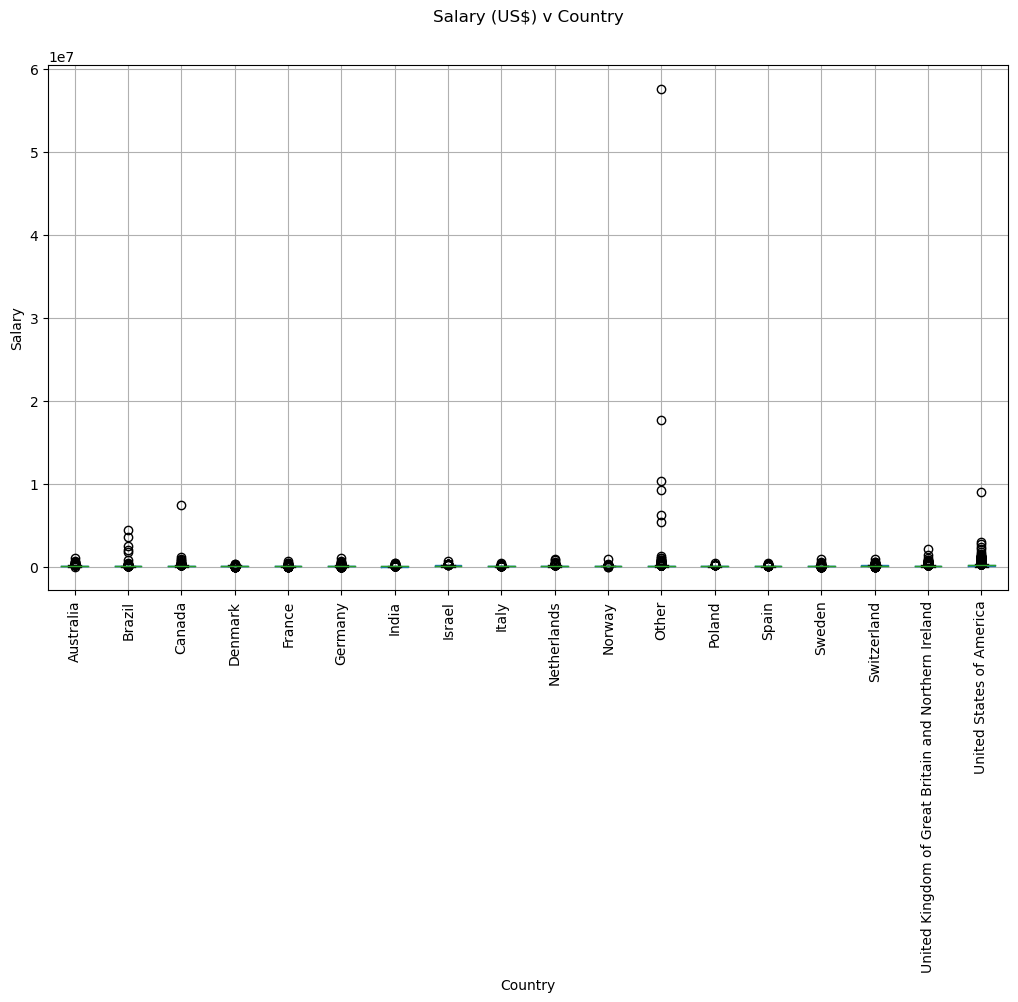

In [111]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [112]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

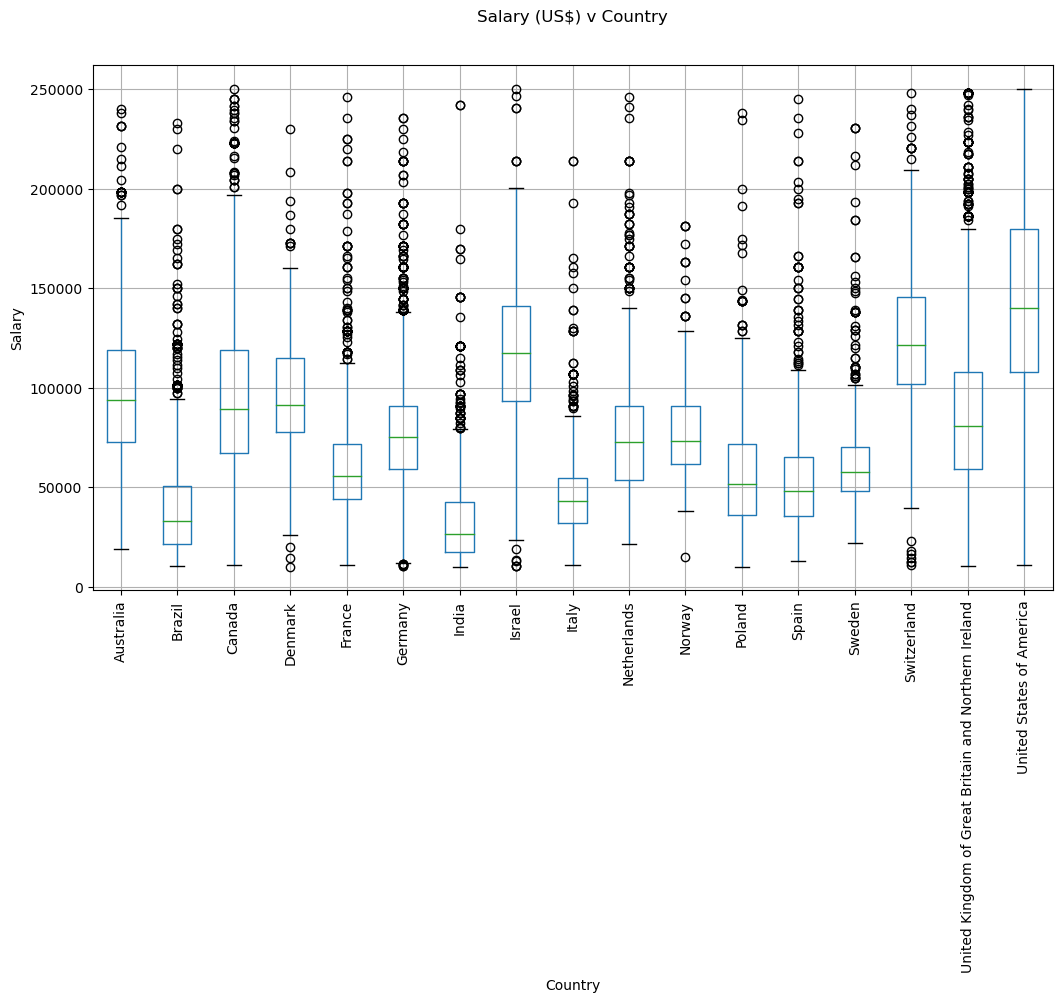

In [113]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [114]:
df["YearsCode"].unique()

array(['27', '12', '21', '4', '5', '10', '15', '11', '24', '6', '20',
       '13', 'Less than 1 year', '3', '16', '33', '32', '29', '26', '7',
       '14', '8', '9', '23', '35', '30', '40', '45', '31', '43', '25',
       '22', '18', '17', '42', '39', '38', '28', '1', '19', '2', '44',
       '37', '34', '41', '36', '48', 'More than 50 years', '49', '47',
       '50', '46'], dtype=object)

In [115]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCode'] = df['YearsCode'].apply(clean_experience)

In [116]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Some college/university study without earning a degree',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Primary/elementary school', 'Something else'], dtype=object)

In [117]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [118]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [119]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_

array([0, 1, 2, 3])

In [120]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([16, 15,  0,  9,  5, 13,  4, 12,  1,  8,  2, 14,  6, 10,  3,  7, 11])

In [121]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [122]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X, y.values)

LinearRegression()

In [123]:
y_pred = linear_reg.predict(X)

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$46,326.74


In [125]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [126]:
y_pred = dec_tree_reg.predict(X)

In [127]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,783.42


In [128]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [129]:
y_pred = random_forest_reg.predict(X)

In [130]:
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,854.01


In [131]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [132]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred = regressor.predict(X)
error = np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$36,180.13


In [133]:
X

,Country,EdLevel,YearsCode
2,16,0,27.0
3,16,0,12.0
5,15,1,21.0
6,16,1,4.0
7,16,0,5.0
...,...,...,...
89156,16,0,12.0
89158,13,0,11.0
89162,1,2,30.0
89167,6,0,6.0


In [134]:
# country, edlevel, yearscode
X = np.array([["United States of America", 'Master’s degree', 15 ]])
X

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [135]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[16.,  2., 15.]])

In [136]:
y_pred = regressor.predict(X)
y_pred

c:\Users\abudo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([164325.77319588])

In [137]:
import pickle

In [138]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_model.pkl', 'wb') as file:
    pickle.dump(data, file)

In [139]:
with open('saved_model.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [140]:
y_pred = regressor_loaded.predict(X)
y_pred

c:\Users\abudo\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([164325.77319588])